In [162]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [163]:
x,y = make_regression(n_samples = 100, n_features = 1, n_informative = 1, n_targets = 1, noise = 20,random_state = 0)

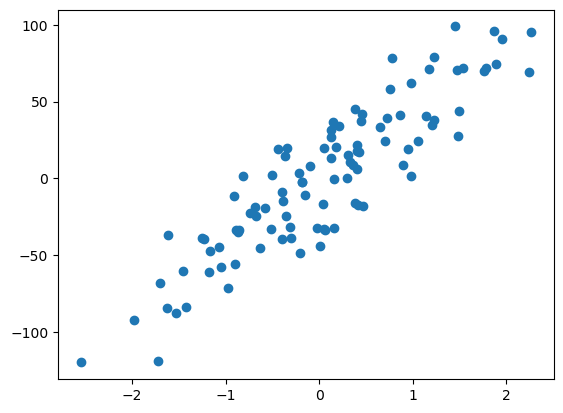

In [164]:
plt.scatter(x,y)

In [165]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [166]:
print(lr.coef_)
print(lr.intercept_)

[42.85335573]
-1.6283636540614514


In [167]:
class GDRegression:
    def __init__(self,learning_rate,epochs):
        self.m = 42.85335573
        self.b = 0
        self.LR = learning_rate
        self.epochs = epochs
        self.loss_slop = None
        self.step_size = None
        
    def fit(self,x,y):
        x = x.ravel()
        for i in range(0,self.epochs):
            
            self.loss_slop = -2 * np.sum(y - self.m * x.ravel() - self.b)
            self.step_size = self.LR * self.loss_slop 
            self.b = self.b - self.step_size
        
    def pridict(self,x):
        for i in range(0,self.epochs):
            y_pred = self.m * x + self.b
        return y_pred
            

In [168]:
gdr = GDRegression(0.001,20)

In [169]:
gdr.fit(x,y)
y_pred = gdr.pridict(x)

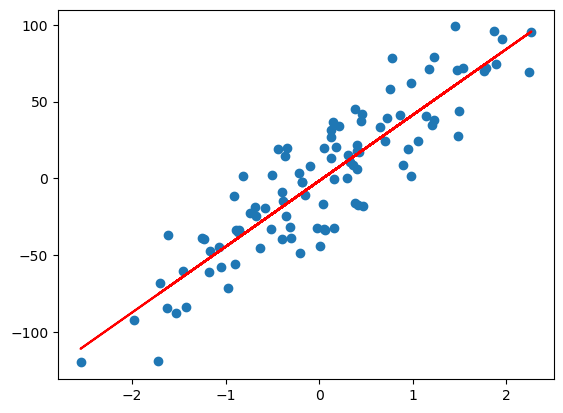

In [170]:
plt.scatter(x,y)
plt.plot(x, y_pred, color = "Red")